In [0]:
#랜덤 포레스트 분석
# 500개의 feature가 있으면 500개의 feature를 사용하지만, 중복을 허용한다.

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
train = pd.read_csv('/content/sample_data/katrain.csv')
test = pd.read_csv('/content/sample_data/katest.csv')

In [8]:
train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
train.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,15035.000000,1.503500e+04,15035.000000,15035.000000,15035.000000,1.503500e+04,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000
mean,7517.000000,5.406827e+05,3.369139,2.115065,2083.790223,1.529697e+04,1.498071,0.007117,0.234253,3.406651,7.660725,1794.158164,289.632059,1971.100432,83.798936,98078.031726,47.560721,-122.213677,1992.754772,12823.884935
std,4340.374984,3.715247e+05,0.902721,0.767519,922.134087,4.261282e+04,0.538522,0.084063,0.763376,0.646505,1.179803,831.738609,440.663284,29.407612,400.398498,53.297815,0.138164,0.141294,691.456442,27736.259787
min,0.000000,7.800000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3758.500000,3.220000e+05,3.000000,1.750000,1430.000000,5.027500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.472700,-122.328000,1490.000000,5100.000000
50%,7517.000000,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.571900,-122.231000,1850.000000,7610.000000
75%,11275.500000,6.450000e+05,4.000000,2.500000,2560.000000,1.069550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2230.000000,550.000000,1997.000000,0.000000,98117.000000,47.678300,-122.126000,2360.000000,10076.000000
max,15034.000000,7.700000e+06,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [17]:
print(train.isnull().sum())
print(test.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [12]:
test.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [13]:
train.shape

(15035, 21)

In [14]:
test.shape

(6468, 20)

In [0]:
X_all = train.drop(['price'],axis=1)

In [0]:
y= train.price

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
# 뭘 쓸지 선택한 후 데이터 나누기
sel = ['bedrooms','bathrooms','sqft_living','sqft_lot','condition']

X = X_all[sel]
Y = y

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,
                                                   random_state=42)

In [50]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [0]:
# bootstrap=True : 중복허용featurn
# criterion='gini' : 지니계수
# n_estimators = 5 : 5개의 모델

In [0]:
forest.fit(x_train,y_train)
pred = forest.predict(x_test)

In [53]:
# 변수의 중요도
print(forest.feature_importances_)

[0.06240367 0.10469531 0.34503824 0.48786278]


In [0]:
# ['bedrooms','bathrooms','sqft_living','sqft_lot']
# [0.06740935 0.10019052 0.34973609 0.48266404]

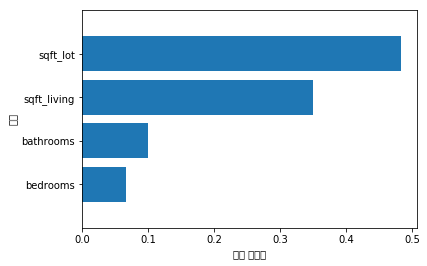

In [39]:
def plot_feature_importances_cancer(model, dataset):
 n_features = dataset.shape[1]
 plt.barh(range(n_features), model.feature_importances_, align='center')
 plt.yticks(np.arange(n_features), dataset.columns)
 plt.xlabel("특성 중요도")
 plt.ylabel("특성")
 plt.ylim(-1, n_features)

plot_feature_importances_cancer(forest, X)

In [40]:
pred

array([360000., 443000., 205000., ..., 216000., 470000., 291375.])

In [0]:
sample = pd.read_csv('/content/sample_data/kasample_submission.csv')

In [37]:
sample.shape

(6468, 2)

In [0]:
## 20개의 모델
from sklearn.ensemble import RandomForestRegressor

In [0]:
sel = ['bedrooms','bathrooms','sqft_living','sqft_lot','condition','view','waterfront']

X = train[sel]
Y = train.price

X_test = test[sel]

In [106]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                   random_state=42)
forest = RandomForestRegressor(n_estimators=20, random_state=2,max_depth=3)
forest.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20,
                      n_jobs=None, oob_score=False, random_state=2, verbose=0,
                      warm_start=False)

In [0]:
pred = forest.predict(X_test)

In [108]:
pred.shape

(6468,)

In [109]:
pred

array([ 590403.02073068,  447200.51090179, 1561881.61951201, ...,
        347666.86342103,  347666.86342103,  444782.42553226])

In [0]:
sample.price = pred

In [0]:
sample.to_csv('sample_submission.csv',index=False)

In [112]:
## 모델에 대한 평가
cnt = 1
for model in forest.estimators_ :
  model.fit(x_train,y_train)
  
  if cnt % 5 == 0 :
    print('훈련세트정확도 : {:.3f}'.format(model.score(x_train,y_train)))
    print('테스트세트정확도 : {:.3f}'.format(model.score(x_test,y_test)))
  cnt += 1

훈련세트정확도 : 0.559
테스트세트정확도 : 0.438
훈련세트정확도 : 0.559
테스트세트정확도 : 0.438
훈련세트정확도 : 0.559
테스트세트정확도 : 0.438
훈련세트정확도 : 0.559
테스트세트정확도 : 0.438


In [0]:
# learning rate : 학습속도